In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,package
70,5.79,2.35
111,5.42,2.25
167,8.13,3.60
74,6.85,3.44
133,6.05,2.58


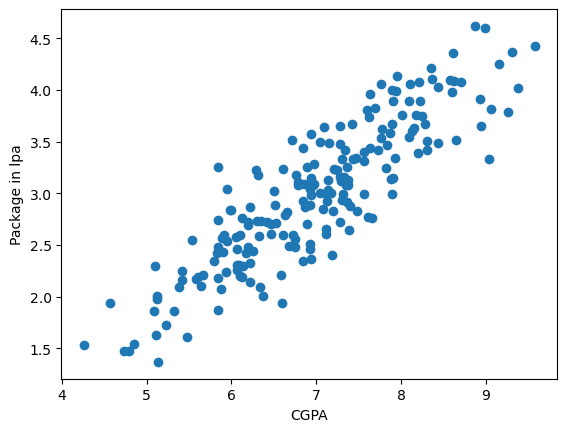

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')
plt.show()

In [5]:
x = df.iloc[:,0:1]
y = df.drop(columns=['cgpa'])


In [6]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [9]:
from sklearn.linear_model import LinearRegression



In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [13]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [14]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

C:\Users\Khan2\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.38464568]])

In [15]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


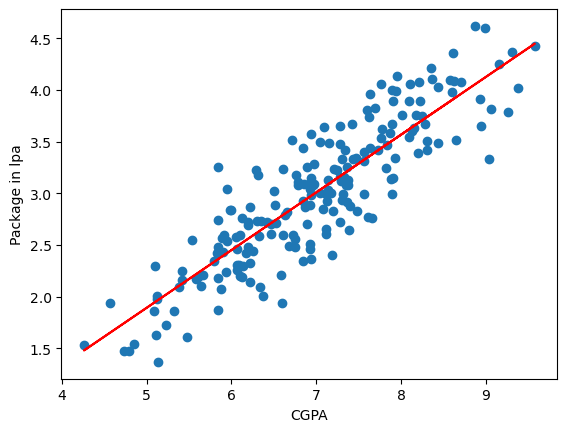

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')
plt.show()

In [17]:
m = lr.coef_

In [18]:
c = lr.intercept_

In [19]:
# y = mx+c
print(f"y = {m[0][0]}*x{c[0]}")

y = 0.557951973425072*x-0.8961119222429144


In [20]:
m[0][0]

0.557951973425072

In [21]:
c[0]

-0.8961119222429144

## Calculating metrics 

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [79]:
y_pred =lr.predict(x_test)

In [82]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  0.2884710931878175


In [84]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  0.12129235313495527


In [86]:
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE  0.34827051717731616


In [90]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [94]:
# Adjusted R2 score
n = x_test.shape[0]

In [96]:
1-((1-r2)*(n-1)/(n-1-1))

0.7749598882343415

In [108]:
# Testing difference between r2 score and adjusted R2 score by adding a random featur
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.285663,3.26
1,5.12,0.775914,1.98
2,7.82,0.690654,3.25
3,7.42,0.159144,3.67
4,6.94,0.421195,3.57


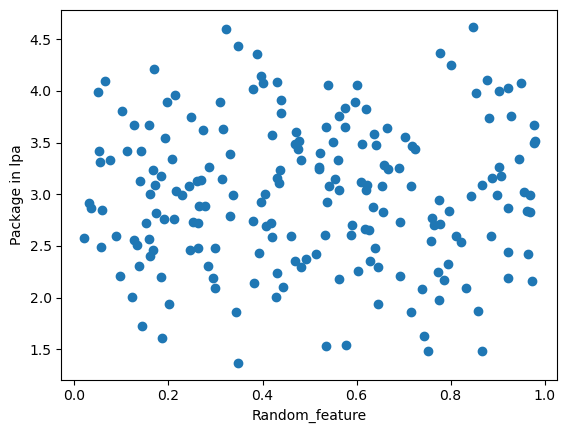

In [110]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('Random_feature')
plt.ylabel('Package in lpa')
plt.show()

In [114]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [118]:
lr = LinearRegression()

In [120]:
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
y_pred = lr.predict(x_test)

In [124]:
print("R2 score ", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score  0.7605201450557076


In [126]:
print("Adjusted R2 Score ",1-((1-r2)*(40-1))/(40-1-2))

Adjusted R2 Score  0.7475752880316918


# Creating my own lr model

In [26]:
class MeraLR:
    
    def __init__(self):
        self.m = None
        self.b = None

    
    def fit(self,x_train,y_train):
        num = 0
        den = 0
        for i in range(x_train.shape[0]):
             num = num+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
             den = den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))

        self.m = num/den
        self.b = y_train.mean()-self.m*x_train.mean()

        print(self.m)
        print(self.b)


    def predict(self,x_test):
        return self.m*x_test+self.b
    

In [27]:
import numpy as np
import pandas as pd

In [28]:
# df = pd.read_csv('placement.csv')

In [29]:
# df.head()

In [30]:
# x = df.iloc[:,0].values
# y = df.iloc[:,1].values

In [31]:
# x,y

In [32]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
# x_train.shape[0]

In [34]:
# lr = MeraLR()
# lr.fit(x_train,y_train)

In [35]:
# lr.predict(x_test[0])

In [36]:
# x_test[0]